<a href="https://colab.research.google.com/github/vnathu/PhanTichDuLieuHocSau/blob/main/lab05(hw).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#khai báo các thư viện
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from scipy.stats import kurtosis
from matplotlib import pyplot as plt

In [2]:
# lấy dữ liệu
df = pd.read_fwf("https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/babies.txt")
df

,bwt,smoke
0,120.0,0.0
1,113.0,0.0
2,128.0,1.0
3,123.0,0.0
4,108.0,1.0
...,...,...
1232,128.0,0.0
1233,130.0,1.0
1234,125.0,0.0
1235,117.0,0.0


0 : Là người mẹ không hút thuốc

1 : Là người mẹ không có thuốc

1. Mô tả dữ liệu bằng các giá trị số:


Bước 1: Tính các đại lượng thống kê cho hai tập dữ liệu

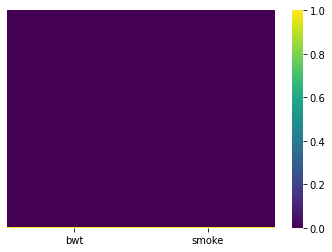

In [3]:
sns.heatmap(df.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

In [4]:
# Tạo các hàm
def Q0(g):
  return np.percentile(g,0)
def Q1(g):
  return np.percentile(g,25)
def Q2(g):
  return np.percentile(g,50)
def Q3(g):
  return np.percentile(g,75)
def IQR(x):
  return np.subtract(*np.percentile(x, [75, 25]))
def kurt(x):
  return kurtosis(x, fisher=False)

In [5]:
# trình bày các đại lượng
data =  df[df.smoke.isin(['0','1','9'])].groupby(["smoke"]).agg({'count','var','min',
                                                                 'max','mean','std',
                                                                 'median',Q0,Q1,Q2,Q3,IQR,
                                                                 'skew',kurt}).rename(columns={'bwt':'Statistical','median':'Median','var':'Var','mean':'Mean',
                                                                                                                        'std':'Std','max':'Max','min':'Min',
                                                                                                                        'skew':'Skewness','kurt':'Kurtosis',
                                                                                                                        'count':'Count','Q0':'Quantile 0',
                                                                                                                        'Q1':'Quantile 25','Q2':'Quantile 50',
                                                                                                                        'Q3':'Quantile 75'})
data

Statistical                   ...                                  
      Quantile 25  Skewness    Max  ...         Var        Mean  Kurtosis
smoke                               ...                                  
0.0        113.00 -0.187363  176.0  ...  302.714371  123.047170  4.037060
1.0        102.00 -0.033700  163.0  ...  327.571835  114.109504  2.988032
9.0        109.75 -0.199227  158.0  ...  475.788889  126.700000  1.932738

[3 rows x 14 columns]

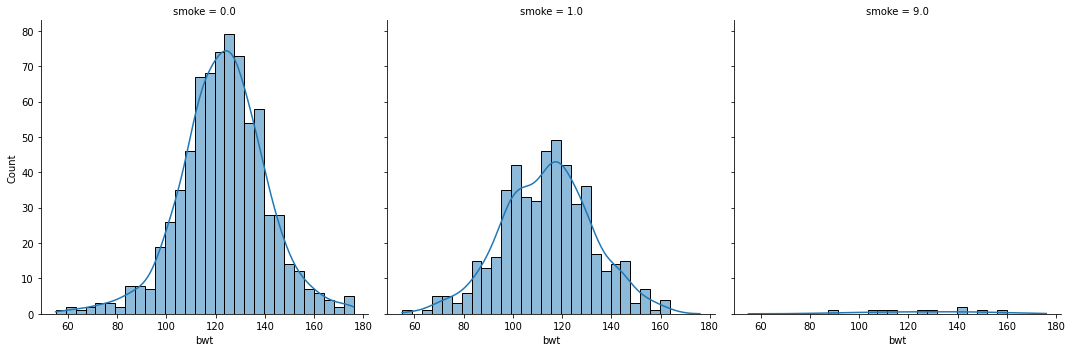

In [6]:
sns.displot(df,x='bwt',col='smoke',kde=True)

 So sánh các giá trị thống kê mô tả của hai tập dữ liệu.

Sự khác biệt về vị trí tập trung dữ liệu: chênh lệch khoảng 123 -115 = 8

Nhận xét: khác biệt không đáng kể.

In [7]:
data_BD =  df[df.smoke.isin(['0','1','9'])].groupby(["smoke"]).agg({'var','std',IQR}).rename(columns={'bwt':'Statistical','var':'Var','std':'Std'})
data_BD

Statistical                       
              IQR         Var        Std
smoke                                   
0.0          21.0  302.714371  17.398689
1.0          24.0  327.571835  18.098946
9.0          32.0  475.788889  21.812586

In [8]:
data_CL =  df[df.smoke.isin(['0','1','9'])].groupby(["smoke"]).agg({'skew',kurt}).rename(columns={'bwt':'Statistical',
                                                                                                  'skew':'Skewness','kurt':'Kurtosis'})
data_CL

Statistical          
         Kurtosis  Skewness
smoke                      
0.0      4.037060 -0.187363
1.0      2.988032 -0.033700
9.0      1.932738 -0.199227

Nhận xét: trường hợp bà mẹ hút thuốc có phân bố dữ liệu nhọn hơn, đối xứng hơn so với trường hợp không hút thuốc. Cả 2 trường hợp đều hơi lệch về trái.

2. Biểu diễn hình học của dữ liệu0

1. Dữ liệu cân nặng của trẻ trong trường hợp bà mẹ hút thuốc và bà mẹ không hút thuốc Ta sẽ phân tích các biểu đồ:

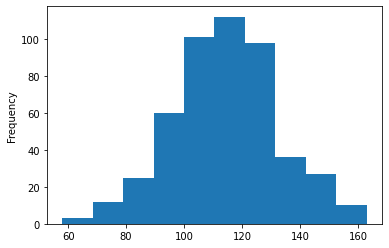

In [9]:
df.loc[(df.smoke== 1),'bwt'].plot.hist()

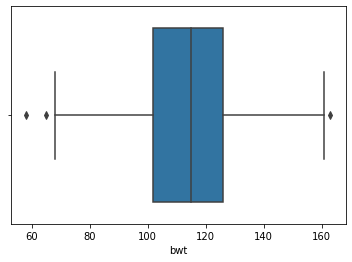

In [10]:
sns.boxplot(x='bwt', data = df.loc[(df.smoke== 1)])

b. Histogram và Boxplot trong trường hợp bà mẹ không hút thuốc:

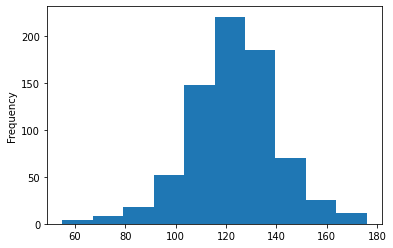

In [11]:
df.loc[(df.smoke== 0),'bwt'].plot.hist()

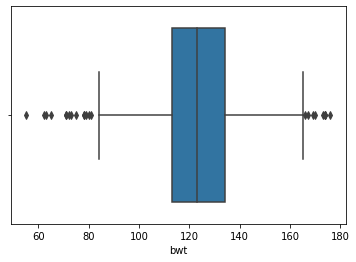

In [12]:
sns.boxplot(x='bwt', data = df.loc[(df.smoke== 0)])

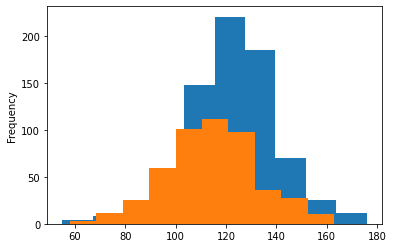

In [13]:
df.loc[(df.smoke== 0),'bwt'].plot.hist()
df.loc[(df.smoke== 1),'bwt'].plot.hist()